# Purchase Behavior Analysis
## Luke Sullivan

---

## Dataset
The dataset used for this analysis is the **Walmart Customer Purchase Behavior Dataset** collected by Walmart available on [Kaggle.com](https://www.kaggle.com/datasets/logiccraftbyhimanshi/walmart-customer-purchase-behavior-dataset).

In [118]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


### Initial Dataset Exploration

In [78]:
data = pd.read_csv('Walmart_customer_purchases.csv')
data.shape

(50000, 12)

In [79]:
columns = np.array(data.columns)
print('Columns:', columns)

Columns: ['Customer_ID' 'Age' 'Gender' 'City' 'Category' 'Product_Name'
 'Purchase_Date' 'Purchase_Amount' 'Payment_Method' 'Discount_Applied'
 'Rating' 'Repeat_Customer']


In [80]:
print(data.isnull().sum())

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64


In [81]:
data.dtypes

Customer_ID          object
Age                   int64
Gender               object
City                 object
Category             object
Product_Name         object
Purchase_Date        object
Purchase_Amount     float64
Payment_Method       object
Discount_Applied     object
Rating                int64
Repeat_Customer      object
dtype: object

In [82]:
data.head(10)

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes
5,fdf82943-1b5f-4e0a-bf42-9a8e2035924e,59,Female,North Josemouth,Electronics,Laptop,2024-02-15,435.48,Cash on Delivery,No,3,No
6,582e8439-2b9b-46bd-93ff-71d610f455cc,47,Male,Johnsonton,Beauty,Perfume,2024-12-19,231.04,Debit Card,No,4,Yes
7,664555b7-7fd7-44a8-b4da-ec00230381b9,23,Other,Hoffmanmouth,Home,Sofa Cover,2024-09-28,240.91,Cash on Delivery,No,2,No
8,a8e37b6a-d34c-4d21-84fc-ef713d4859be,60,Female,South Billyberg,Beauty,Shampoo,2025-01-30,179.76,UPI,Yes,5,Yes
9,fa3bfd3a-99a4-41c7-bebc-8b04dc4c95f7,52,Female,North Katherinemouth,Home,Cookware,2024-12-23,463.43,Cash on Delivery,Yes,3,No


In [83]:
unique_id_count = data['Customer_ID'].nunique()
print("Number of unique Customer_IDs:", unique_id_count)

Number of unique Customer_IDs: 50000


In [84]:
#all customer id values are unique, assume I.I.D?

### Gender

In [85]:
print(data['Gender'].unique())

['Female' 'Other' 'Male']


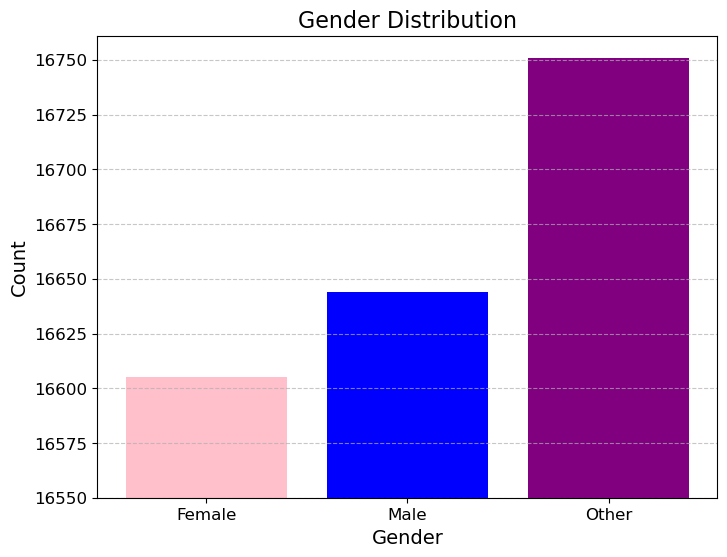

Female Gender Count: 16605
Male Gender Count: 16644
Other Gender Count: 16751


In [86]:
female_gender_count = data[data['Gender'] == "Female"].shape[0]
male_gender_count = data[data['Gender'] == "Male"].shape[0]
other_gender_count = data[data['Gender'] == "Other"].shape[0]

gender_counts = {
    "Female": female_gender_count,
    "Male": male_gender_count,
    "Other": other_gender_count
}

plt.figure(figsize=(8, 6)) 
plt.bar(gender_counts.keys(), gender_counts.values(), color=['pink', 'blue', 'purple'])
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
min_y = 16550
max_y = max(gender_counts.values()) + 10  # Set a bit above the largest count
plt.ylim(min_y, max_y)  # Adjust y-axis limits
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
print("Female Gender Count:", female_gender_count)
print("Male Gender Count:", male_gender_count)
print("Other Gender Count:", other_gender_count)

### Age

In [87]:
ages = data['Age'].unique()
ages_array = np.array(ages)
ages_array = np.sort(ages_array)
print(ages_array)

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60]


In [88]:
ages = pd.DataFrame(ages_array)
ages.describe()

,0
count,43.000000
mean,39.000000
std,12.556539
min,18.000000
25%,28.500000
50%,39.000000
75%,49.500000
max,60.000000


Age Group Counts:
<18: 1162
18-24: 7055
25-34: 11602
35-44: 11667
45-54: 11668
55-64: 6846
65+: 0


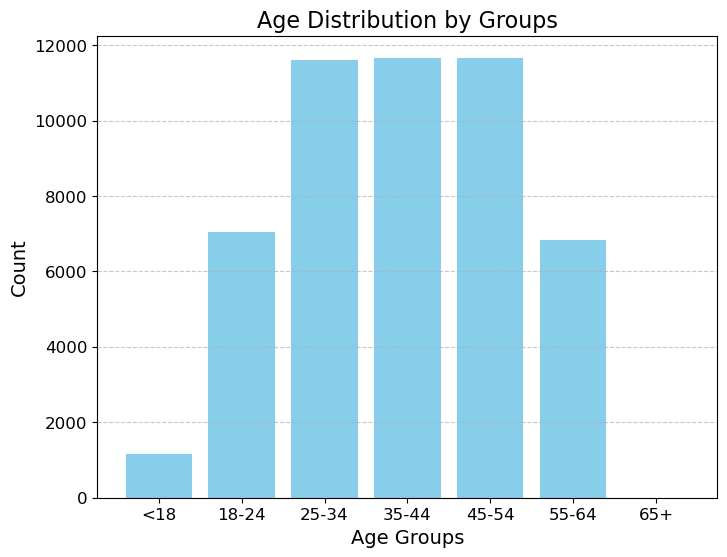

In [89]:
# Create age groups
age_bins = [0, 18, 24, 34, 44, 54, 64, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

age_group_counts = data['Age_Group'].value_counts().sort_index()

print("Age Group Counts:")
for group, count in age_group_counts.items():
    print(f"{group}: {count}")

plt.figure(figsize=(8, 6))
plt.bar(age_group_counts.index.astype(str), age_group_counts.values, color='skyblue')
plt.title("Age Distribution by Groups", fontsize=16)
plt.xlabel("Age Groups", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Teens & 60's are low counts because they only consist of 1-2 year age groups.

### City

In [90]:
print(data.City.nunique())

#25096 unique cities pulled

25096


In [91]:
age_group_counts.head()

Age_Group
<18       1162
18-24     7055
25-34    11602
35-44    11667
45-54    11668
Name: count, dtype: int64

In [92]:
city_counts = data['City'].value_counts()
city_counts.head(15)

# The most purchases from one city is 44. WIth 25000, This means that there is an avg of 2 purchases per city making this
# a difficult column to do proper analysis into city specific analysis. However, for purchase specific analysis this is relatively
# generalized when not worrying about city. City-level analysis will be limited.

City
New Michael         44
North Michael       42
Lake Michael        41
East Michael        36
South Michael       34
Port Michael        34
West Michael        33
West Jennifer       32
East Christopher    32
South John          31
East Robert         31
West Christopher    31
Port James          30
North James         30
New Robert          29
Name: count, dtype: int64

### Category

In [93]:
data.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,Age_Group
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes,45-54
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No,35-44
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No,45-54
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes,45-54
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes,35-44


In [94]:
data.Category.unique()

array(['Electronics', 'Clothing', 'Beauty', 'Home'], dtype=object)

In [95]:
category_counts = data['Category'].value_counts()

In [96]:
category_counts.head()

Category
Electronics    12642
Home           12492
Beauty         12447
Clothing       12419
Name: count, dtype: int64

### Product Name

In [97]:
data.Product_Name.unique()

# Not a lot of products compared to what is sold at store. Will give good generalized analysis on item sub categories
# (product name is basically just a sub category in my opinion lol)

array(['Smartphone', 'T-Shirt', 'Perfume', 'Smartwatch', 'Laptop',
       'Sofa Cover', 'Shampoo', 'Cookware', 'Curtains', 'Jeans',
       'Headphones', 'Jacket', 'Face Cream', 'Lipstick', 'Lamp', 'Dress'],
      dtype=object)

In [98]:
product_name_counts = data['Product_Name'].value_counts()
product_name_counts.head(15)

Product_Name
Headphones    3261
T-Shirt       3206
Smartwatch    3177
Face Cream    3174
Sofa Cover    3156
Cookware      3155
Shampoo       3145
Lamp          3138
Perfume       3116
Laptop        3110
Jacket        3105
Smartphone    3094
Jeans         3067
Curtains      3043
Dress         3041
Name: count, dtype: int64

### Purchase Date

In [99]:
data['Purchase_Date'].dtype

# Need to convert from object to datetime format

dtype('O')

In [100]:
data['Purchase_Date'] = pd.to_datetime(data['Purchase_Date'])

min_date = data['Purchase_Date'].min().date()
max_date = data['Purchase_Date'].max().date()

print(f"Purchase date range: {min_date} to {max_date}")

# About 1 year of data, could do a time series prediction or analysis

Purchase date range: 2024-02-10 to 2025-02-09


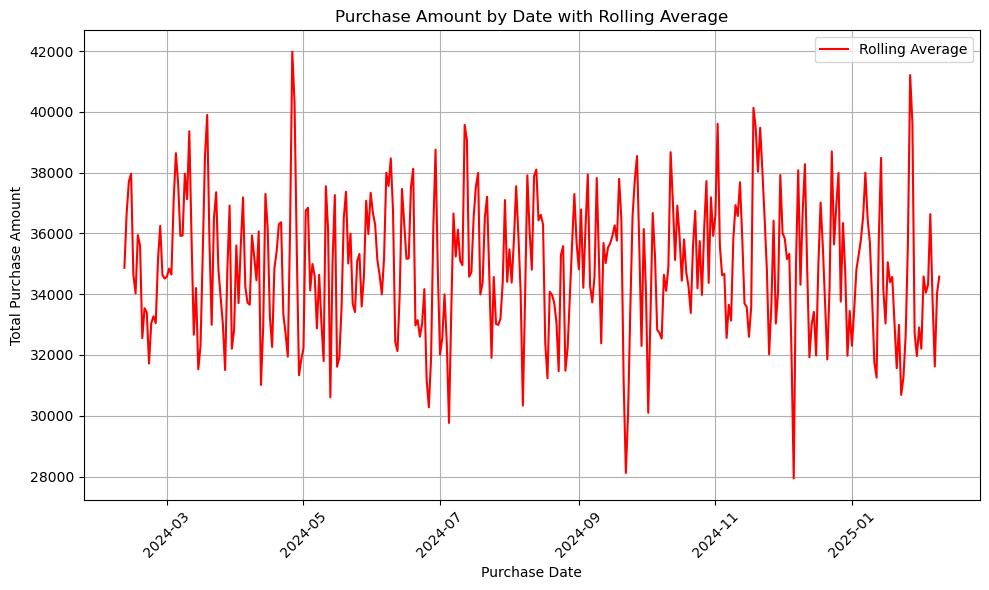

In [101]:
# Group by Purchase_Date and sum Purchase_Amount
grouped_data = data.groupby('Purchase_Date')['Purchase_Amount'].sum()

# Calculate a rolling average (window size = 2 for simplicity)
rolling_avg = grouped_data.rolling(window=2).mean()

# Plot the data
plt.figure(figsize=(10, 6))
#plt.plot(grouped_data.index, grouped_data.values, marker='o', color='blue', label='Total Purchase Amount')
plt.plot(rolling_avg.index, rolling_avg.values, color='red', label='Rolling Average')
plt.title('Purchase Amount by Date with Rolling Average')
plt.xlabel('Purchase Date')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Payment Method

In [102]:
purchase_method_counts = data['Payment_Method'].value_counts()
purchase_method_counts.head()

Payment_Method
Debit Card          12589
Credit Card         12528
Cash on Delivery    12496
UPI                 12387
Name: count, dtype: int64

### Rating


In [103]:
data.Rating.unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [104]:
rating_counts = data['Rating'].value_counts()
rating_counts.head()

Rating
1    10099
4    10045
5    10029
2     9971
3     9856
Name: count, dtype: int64

## Questions

### What is the distribution of customers by age and gender?

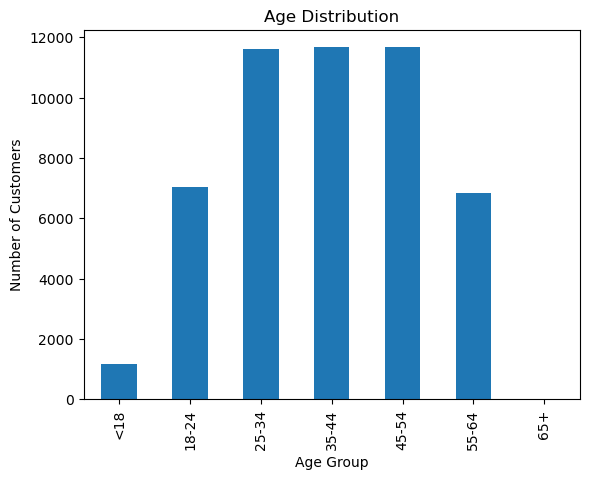

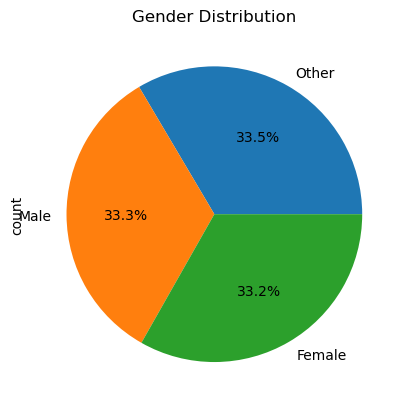

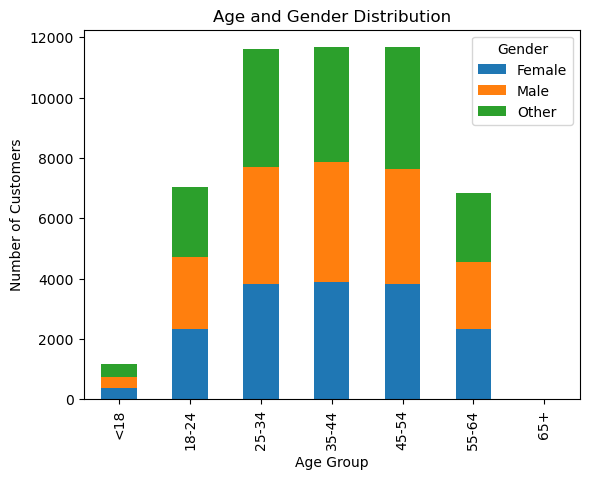

In [105]:
age_distribution = data['Age_Group'].value_counts().sort_index()
age_distribution.plot(kind='bar', title="Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

# Gender distribution
gender_distribution = data['Gender'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', title="Gender Distribution")
plt.show()

# Age and Gender combined
combined_distribution = data.groupby(['Age_Group', 'Gender']).size().unstack()
combined_distribution.plot(kind='bar', stacked=True, title="Age and Gender Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Customers")
plt.show()

In [106]:
average_spending_by_age = data.groupby('Age_Group')['Purchase_Amount'].mean().sort_values(ascending=False)
print(average_spending_by_age)

Age_Group
<18      257.316265
25-34    256.891062
45-54    256.138996
18-24    255.383950
55-64    254.289517
35-44    254.215332
65+             NaN
Name: Purchase_Amount, dtype: float64


In [107]:
# Average spending by gender
gender_spending = data.groupby('Gender')['Purchase_Amount'].mean().sort_values(ascending=False)

# Transaction frequency by gender
gender_frequency = data['Gender'].value_counts(normalize=True) * 100

print("Average Spending:\n", gender_spending)
print("\nTransaction Frequency (%):\n", gender_frequency)

Average Spending:
 Gender
Female    256.382360
Other     255.982589
Male      254.230838
Name: Purchase_Amount, dtype: float64

Transaction Frequency (%):
 Gender
Other     33.502
Male      33.288
Female    33.210
Name: proportion, dtype: float64


In [108]:
city_stats = data.groupby('City').filter(lambda x: len(x) >= 20)
city_spending = city_stats.groupby('City')['Purchase_Amount'].mean().sort_values(ascending=False).head(10)

print("Top 10 Cities by Average Spending:\n", city_spending)

Top 10 Cities by Average Spending:
 City
East David       341.147083
Port Kimberly    333.778000
West Joseph      321.596190
Port Joshua      320.793810
Lake James       317.605200
Michaelmouth     312.575909
East James       310.011667
Lake Robert      306.192414
East Michael     301.847500
North Melissa    298.495714
Name: Purchase_Amount, dtype: float64


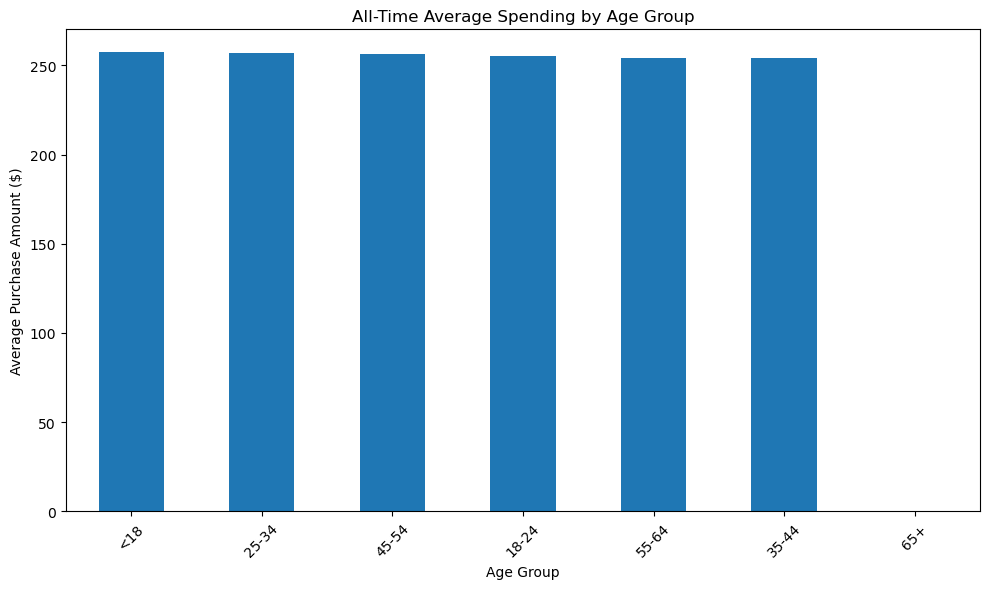

In [109]:
all_time_avg = data.groupby('Age_Group')['Purchase_Amount'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
all_time_avg.plot(kind='bar', color='#1f77b4', title="All-Time Average Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

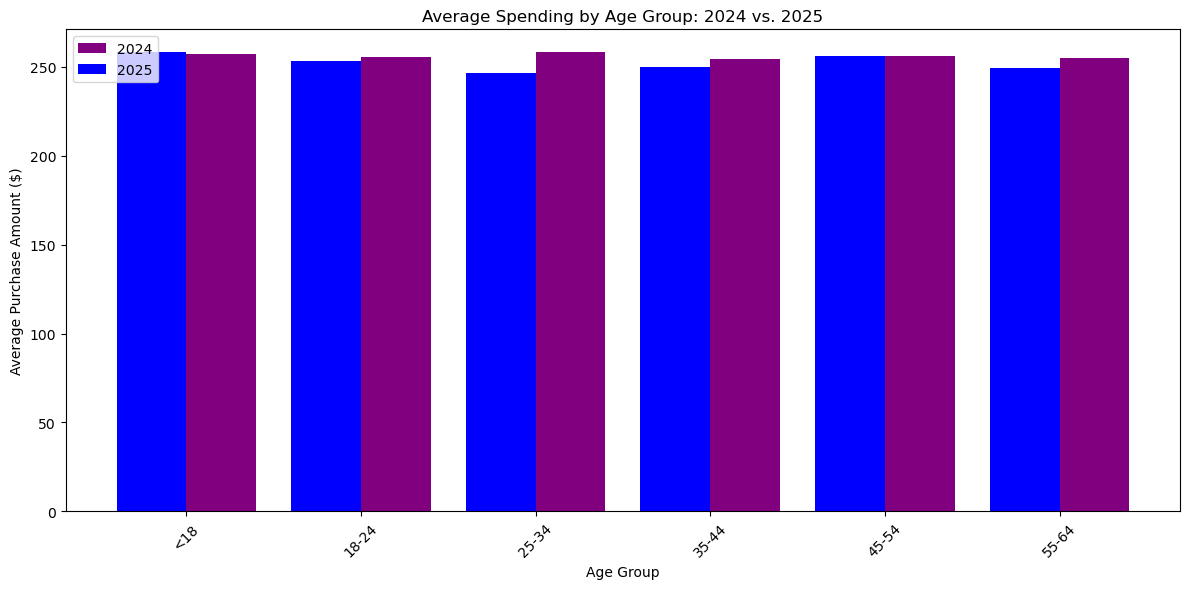

In [115]:
# Filter data by year
data_2023 = data[data['Purchase_Date'].dt.year == 2024]
data_2024 = data[data['Purchase_Date'].dt.year == 2025]

# Calculate averages
avg_2023 = data_2023.groupby('Age_Group')['Purchase_Amount'].mean().reindex(age_labels)
avg_2024 = data_2024.groupby('Age_Group')['Purchase_Amount'].mean().reindex(age_labels)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.bar(age_labels, avg_2023, width=0.4, label='2024', align='edge', color='purple')
plt.bar(age_labels, avg_2024, width=-0.4, label='2025', align='edge', color='blue')
plt.title("Average Spending by Age Group: 2024 vs. 2025")
plt.xlabel("Age Group")
plt.ylabel("Average Purchase Amount ($)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Monthly Spending Trends by Age Group'}, xlabel='Month'>

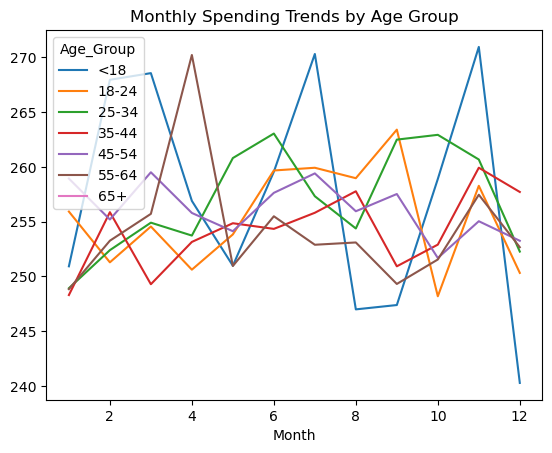

In [116]:
data['Month'] = data['Purchase_Date'].dt.month
monthly_spending = data.groupby(['Age_Group', 'Month'])['Purchase_Amount'].mean().unstack()
monthly_spending.T.plot(title="Monthly Spending Trends by Age Group")

<Figure size 1500x600 with 0 Axes>

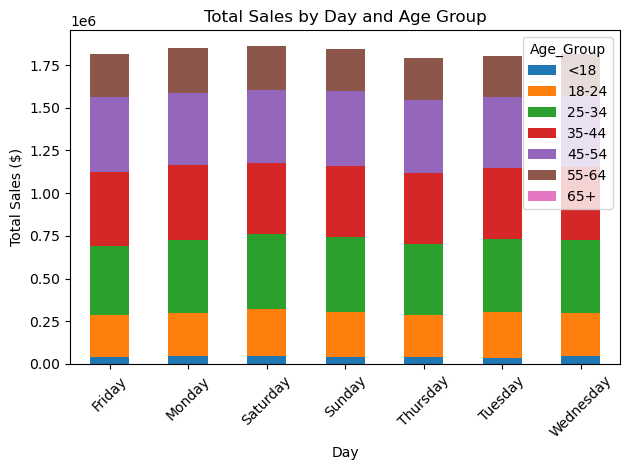

<Figure size 1500x600 with 0 Axes>

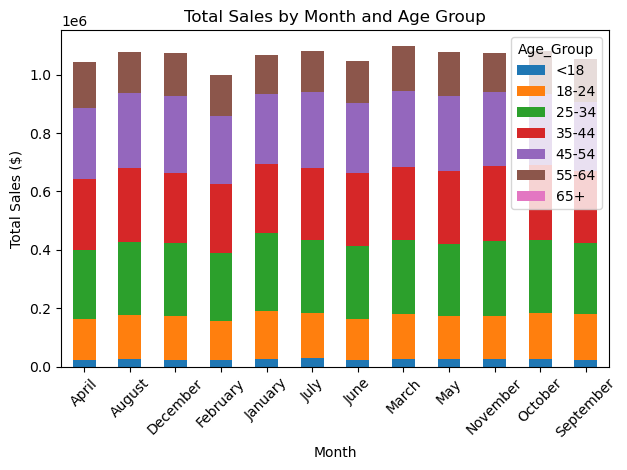

<Figure size 1500x600 with 0 Axes>

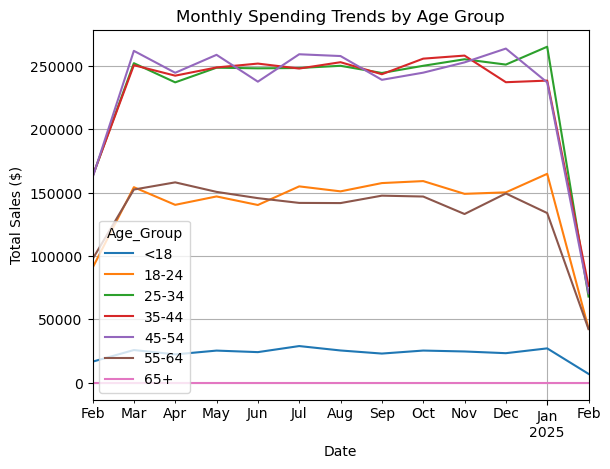

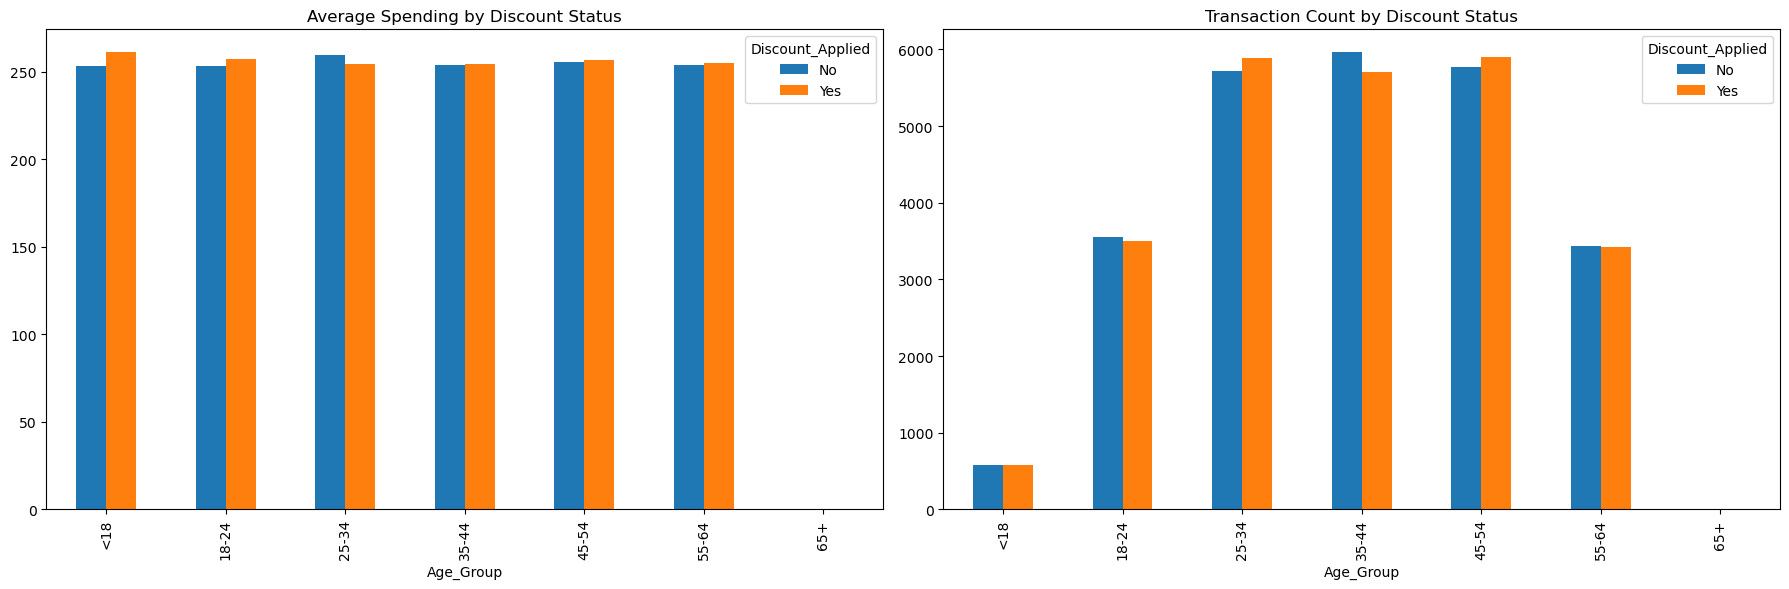

Discount Impact Statistical Results:
  Age_Group   p_value  Discount_Mean  NoDiscount_Mean
0       <18  0.347043     261.221541       253.370450
1     18-24  0.256627     257.296930       253.498429
2     25-34  0.045120     254.298300       259.557255
3     35-44  0.872046     254.431417       254.008633
4     45-54  0.638484     256.750066       255.515225
5     55-64  0.710173     254.928522       253.653120
6       65+       NaN            NaN              NaN


In [119]:
# -------------------------------------------------------------------
# Q1: Peak Sales Days/Months by Age Group
# -------------------------------------------------------------------
# Extract temporal features
data['Day'] = data['Purchase_Date'].dt.day_name()
data['Month'] = data['Purchase_Date'].dt.month_name()

# Daily sales by age group
daily_sales = data.groupby(['Day', 'Age_Group'])['Purchase_Amount'].sum().unstack()

# Monthly sales by age group
monthly_sales = data.groupby(['Month', 'Age_Group'])['Purchase_Amount'].sum().unstack()

# Plotting
plt.figure(figsize=(15, 6))
daily_sales.plot(kind='bar', stacked=True, title="Total Sales by Day and Age Group")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
monthly_sales[age_labels].plot(kind='bar', stacked=True, title="Total Sales by Month and Age Group")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------
# Q2: Monthly Spending Trends by Age Group
# -------------------------------------------------------------------
# Resample to monthly frequency
monthly_trend = data.set_index('Purchase_Date').groupby(
    [pd.Grouper(freq='M'), 'Age_Group']
)['Purchase_Amount'].sum().unstack()

plt.figure(figsize=(15, 6))
monthly_trend.plot(title="Monthly Spending Trends by Age Group")
plt.ylabel("Total Sales ($)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# -------------------------------------------------------------------
# Q3: Discount Impact Analysis by Age Group
# -------------------------------------------------------------------
# Purchase amount comparison
discount_impact = data.groupby(['Age_Group', 'Discount_Applied'])['Purchase_Amount'].agg(['mean', 'count']).unstack()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
discount_impact['mean'].plot(kind='bar', ax=ax[0], title="Average Spending by Discount Status")
discount_impact['count'].plot(kind='bar', ax=ax[1], title="Transaction Count by Discount Status")
plt.tight_layout()
plt.show()

# Statistical test (t-test for each age group)
results = []
for group in age_labels:
    discount = data[(data['Age_Group'] == group) & (data['Discount_Applied'] == 'Yes')]['Purchase_Amount']
    no_discount = data[(data['Age_Group'] == group) & (data['Discount_Applied'] == 'No')]['Purchase_Amount']
    t_stat, p_val = stats.ttest_ind(discount, no_discount)
    results.append({
        'Age_Group': group,
        'p_value': p_val,
        'Discount_Mean': discount.mean(),
        'NoDiscount_Mean': no_discount.mean()
    })

results_df = pd.DataFrame(results)
print("Discount Impact Statistical Results:")
print(results_df)

### What payment methods are most popular among different demographic groups (age, gender)?

<Figure size 1200x600 with 0 Axes>

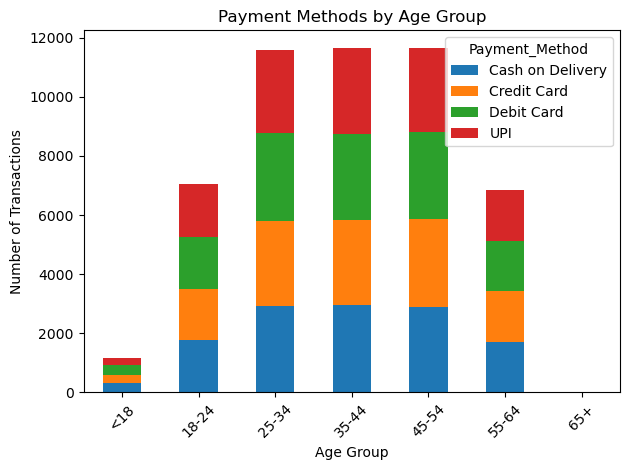

In [120]:
payment_age = data.groupby(['Age_Group', 'Payment_Method']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 6))
payment_age.plot(kind='bar', stacked=True, title="Payment Methods by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

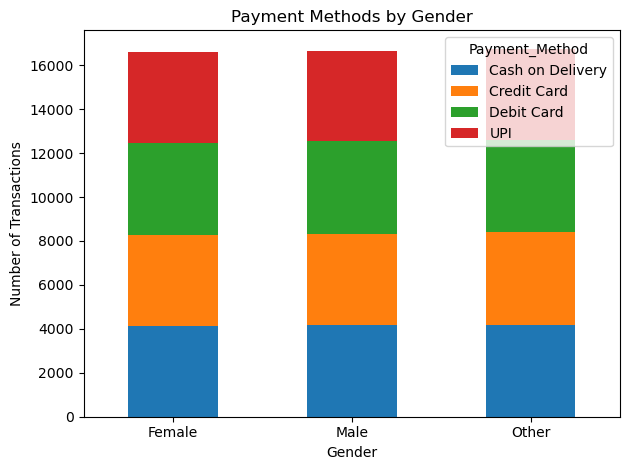

In [121]:
payment_gender = data.groupby(['Gender', 'Payment_Method']).size().unstack().fillna(0)

# Plot
plt.figure(figsize=(10, 6))
payment_gender.plot(kind='bar', stacked=True, title="Payment Methods by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Is there a relationship between payment method and purchase amount or rating?

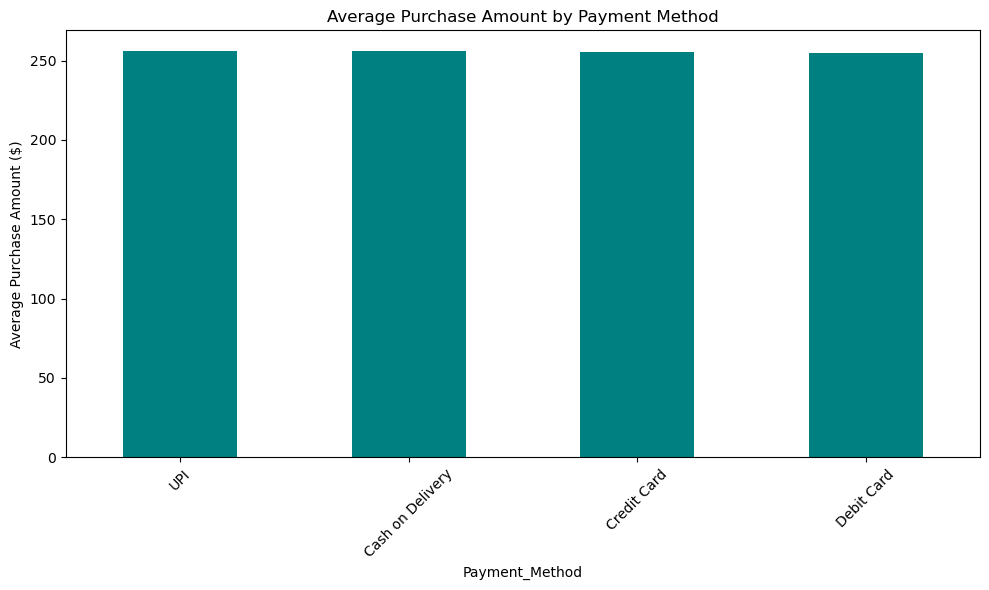

In [122]:
purchase_by_method = data.groupby('Payment_Method')['Purchase_Amount'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
purchase_by_method.plot(kind='bar', color='teal', title="Average Purchase Amount by Payment Method")
plt.ylabel("Average Purchase Amount ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

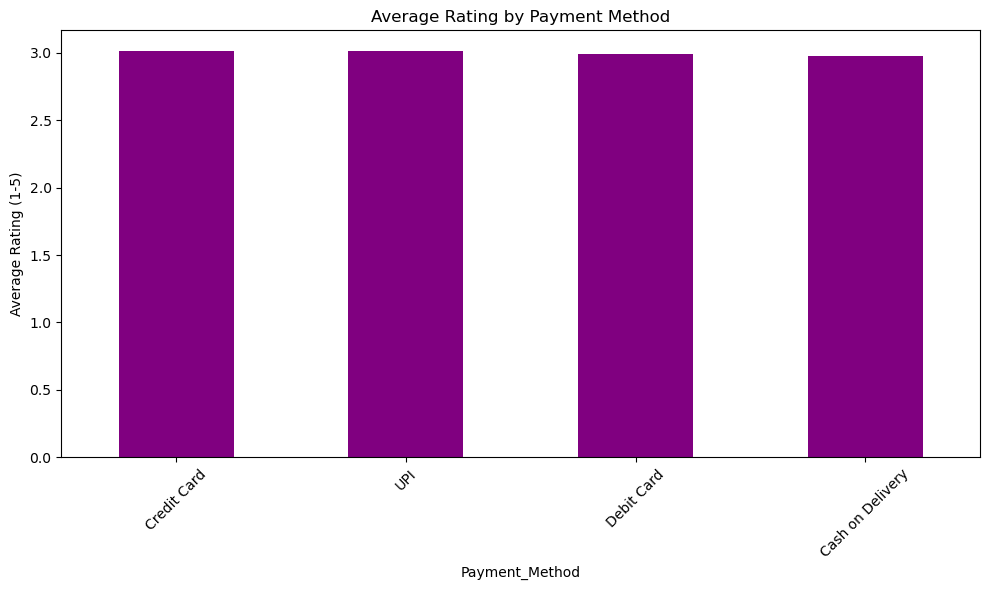

In [123]:
# Average rating by payment method
rating_by_method = data.groupby('Payment_Method')['Rating'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
rating_by_method.plot(kind='bar', color='purple', title="Average Rating by Payment Method")
plt.ylabel("Average Rating (1-5)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [124]:
from scipy.stats import f_oneway

groups = [data[data['Payment_Method'] == method]['Purchase_Amount'] for method in data['Payment_Method'].unique()]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA p-value: {p_value:.4f}")  # p < 0.05 indicates significant differences

ANOVA p-value: 0.8978


In [131]:
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Discount_Applied'] = le.fit_transform(data['Discount_Applied'])
data['Repeat_Customer'] = le.fit_transform(data['Repeat_Customer'])



In [130]:
data.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,Age_Group,Month,Day
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,0,1,Yes,45-54,August,Friday
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,1,1,No,35-44,December,Saturday
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,1,1,No,45-54,December,Thursday
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,0,2,Yes,45-54,November,Monday
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,1,2,Yes,35-44,October,Monday


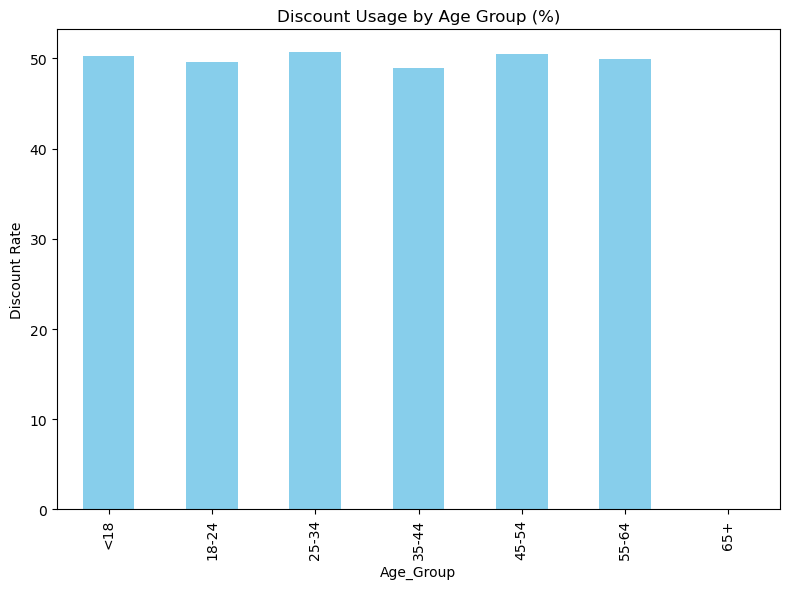

T-test for Ratings (Discount vs. No Discount):
T-statistic = -0.20, p-value = 0.8449


In [133]:
# Discount frequency by age group
discount_freq = data.groupby('Age_Group')['Discount_Applied'].mean() * 100
discount_rating = data.groupby(['Age_Group', 'Discount_Applied'])['Rating'].mean().unstack()
discount_repeat = data.groupby(['Age_Group', 'Discount_Applied'])['Repeat_Customer'].mean().unstack()

# Statistical test for discounts vs. ratings
discounted = data[data['Discount_Applied'] == 1]['Rating']
non_discounted = data[data['Discount_Applied'] == 0]['Rating']
t_stat, p_val = ttest_ind(discounted, non_discounted)

# Visualizations
plt.figure(figsize=(8, 6))
discount_freq.plot(kind='bar', color='skyblue', title="Discount Usage by Age Group (%)")
plt.ylabel("Discount Rate")
plt.tight_layout()
plt.show()

print(f"T-test for Ratings (Discount vs. No Discount):\nT-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")

<Figure size 800x600 with 0 Axes>

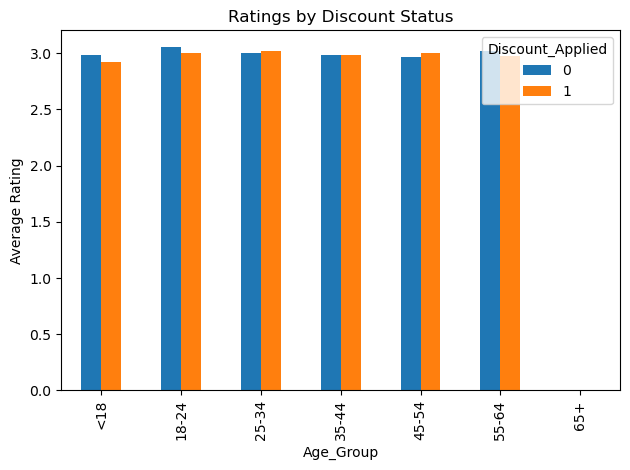

In [134]:
plt.figure(figsize=(8, 6))
discount_rating.plot(kind='bar', title="Ratings by Discount Status")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

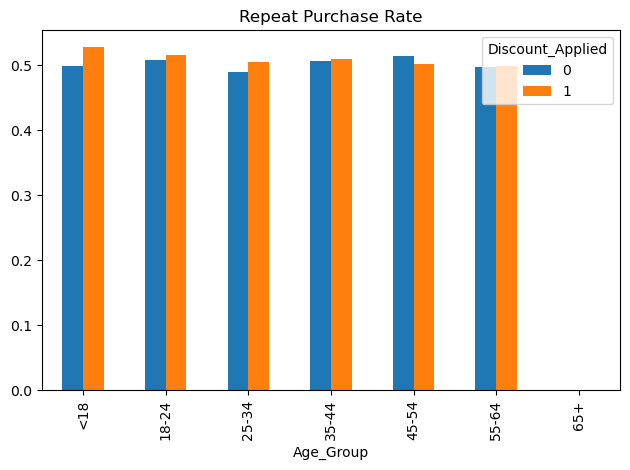

In [135]:
plt.figure(figsize=(8, 6))
discount_repeat.plot(kind='bar', title="Repeat Purchase Rate")
plt.tight_layout()
plt.show()

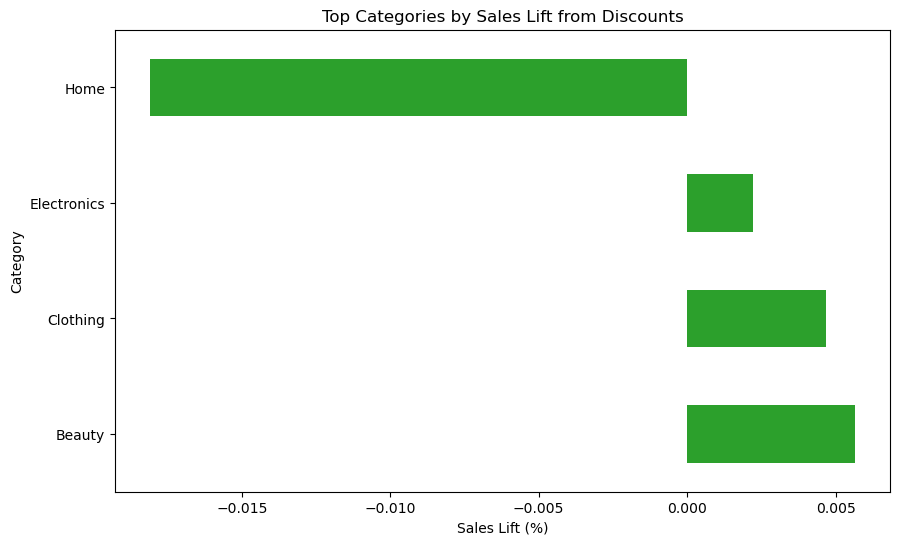

Categories with Highest Sales Lift:
 Category
Beauty         0.005640
Clothing       0.004681
Electronics    0.002217
Home          -0.018087
Name: sales_lift, dtype: float64


In [136]:
# Discount impact by category
category_discount = data.groupby(['Category', 'Discount_Applied'])['Purchase_Amount'].agg(['mean', 'count']).unstack()
category_discount['sales_lift'] = (category_discount[('count', 1)] / category_discount[('count', 0)]) - 1

# Top 5 categories by sales lift
top_categories = category_discount['sales_lift'].sort_values(ascending=False).head(5)

# Visualization
plt.figure(figsize=(10, 6))
top_categories.plot(kind='barh', color='#2ca02c', title="Top Categories by Sales Lift from Discounts")
plt.xlabel("Sales Lift (%)")
plt.show()

print("Categories with Highest Sales Lift:\n", top_categories)


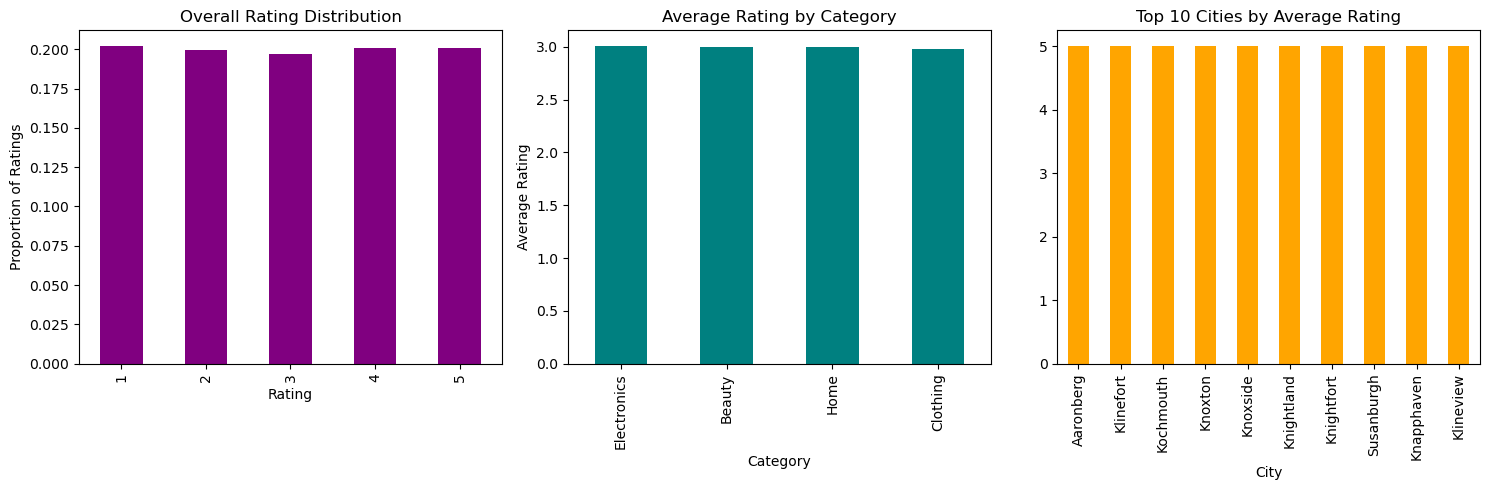

In [138]:
# Rating distribution
rating_dist = data['Rating'].value_counts(normalize=True).sort_index()

# Ratings by category and city
rating_category = data.groupby('Category')['Rating'].mean().sort_values(ascending=False)
rating_city = data.groupby('City')['Rating'].mean().sort_values(ascending=False).head(10)

# Visualizations
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
rating_dist.plot(kind='bar', title="Overall Rating Distribution", color='purple')
plt.ylabel("Proportion of Ratings")

plt.subplot(1, 3, 2)
rating_category.plot(kind='bar', title="Average Rating by Category", color='teal')
plt.ylabel("Average Rating")

plt.subplot(1, 3, 3)
rating_city.plot(kind='bar', title="Top 10 Cities by Average Rating", color='orange')
plt.tight_layout()
plt.show()

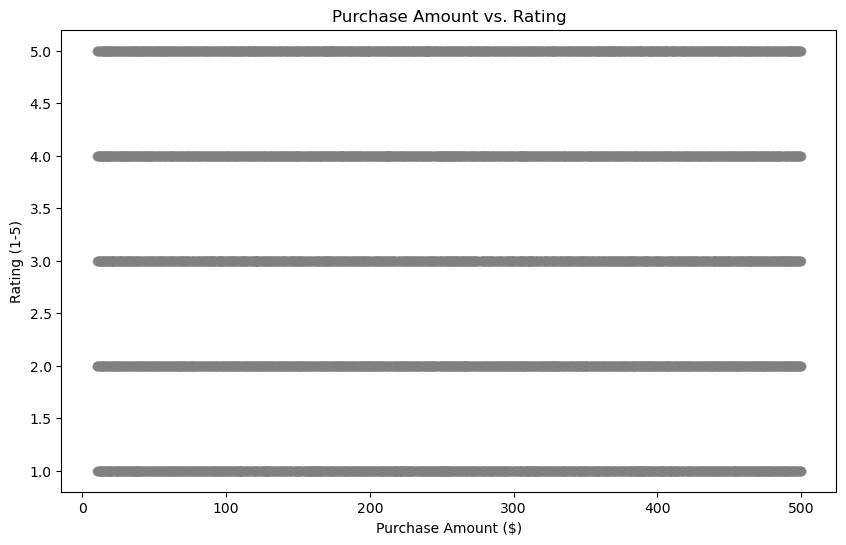

Correlation: -0.01, p-value: 0.1371


In [139]:
from scipy.stats import pearsonr

# Correlation between price and rating
corr, p = pearsonr(data['Purchase_Amount'], data['Rating'])

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(data['Purchase_Amount'], data['Rating'], alpha=0.1, color='gray')
plt.title("Purchase Amount vs. Rating")
plt.xlabel("Purchase Amount ($)")
plt.ylabel("Rating (1-5)")
plt.show()

print(f"Correlation: {corr:.2f}, p-value: {p:.4f}")